# Introduction

One of the main tenets of contemporary finance theory is mean-variance portfolio theory (MPT). Harry Markowitz, the creator, was granted the 1990 Nobel Prize in Economics based on this theoretical innovation. Despite being developed in the 1950s, this theory is still taught to finance students and used in real-world situations today. Our main goal with MPT is to use the principle of <i>diversification</i> to obtain the least portfolio risk possible given a certain return percentage or to obtain the maximum return possible using a certain risk percentage.

In this project, we have a client who is a technology enthusiast and he would like to invest in tech companies. The client does not want to invest more than 40% of his budget in any single stock. Normally, we would like to ask the client in what companies he would like to invest in. However, considering that our client is fictional, we are going to assume that he wants to invest in the biggest tech companies (Meta, Apple, Amazon, Netflix, and Google), colloquially known as the MAANG companies. We chose the MAANG stocks because they represent the biggest companies in Technology and all of them have significant investments in FinTech. Thus, our goal is to apply the principles of Portfolio Optimisation to determine which of the MAANG stocks our client should invest in.

## Structure

As per feedback from the lecturer, there is no EDA for this project. Accordingly, this notebook will be divided into the following sections:
<ul>
    <li><b>Importing the libraries:</b> We will import the data science stack and install a few additional libraries that we will need for this project.</li>
    <li><b>Stock data retrieval:</b> We will use <i>pandas_datareader</i> and <i>yfinance</i> to retrieve the stock data of the MAANG companies.</li>
    <li><b>The Expected Return and Volatility:</b> We will briefly explain the concept of the Expected Return in Portfolio Theory and apply it to our problem. Additionally, we will calculate the Sharpe Ratio and visualize it.</li>
    <li><b>The Optimal Portfolio:</b> Here, our goal is to optimize our portfolio. To do that, we need to maximize the Sharpe Ratio we calculated in the previous step.</li>
    <li><b>The Efficient Frontier:</b> The basic principle is that investors will only invest in a stock if it is on the efficient frontier. We will calculate and visualize the efficient frontier to determine which stocks our client should invest in.</li>
</ul>

# Importing the libraries

We will start by installing 2 important packages:
<ol>
    <li>pandas-datareader</li>
    <li>yfinance</li>
</ol>
We need both of these packages because we will get the stocks data of the MAANG companies from them.

In [1]:
# Use the pip command to install pandas_datareader and yfinance
!pip install pandas-datareader
!pip install yfinance

Next, we will import the following libraries from the python data science stack:
<ul>
    <li><i>numpy:</i> We will use <i>numpy</i> for all mathematical calculations.</li>
    <li><i>pandas:</i> To be able to interact with the stocks data by putting it into a dataframe.</li>
    <li><i>matplotlib.pyplot:</i> To effectively visualize all the operations we undertake on the dataset.</li>
</ul>

Additionally, we will make use of the packages we just installed and a a core python library:
<ul>
    <li><i>pandas_datareader.data:</i> This will be our main method to get the stocks data of the MAANG companies.</li>
    <li><i>yfinance:</i> We will only use it to call the <i>pdr_override</i> method to make the data retrieval faster.</li>
    <li><i>datetime:</i> We need it for all operations requiring date and time information.</li>
</ul>

We will import additional libraries should the need arise for them.

In [2]:
# Data manipulation libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)

# Pyplot will be used for data visualization
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
pd.plotting.register_matplotlib_converters()
%matplotlib inline

# Stock data libraries
import pandas_datareader.data as wb
import yfinance as yf

# datetime library for date and time operations
from datetime import datetime

# Call the pdr_override method to let yfinance handle the data retrieval so it becomes faster
yf.pdr_override()

# Stock data retrieval

We officially start by importing the stock data using the ticker symbol of each of the MAANG companies.

In [3]:
# Preliminary data to import the stock information
maang_tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
start = datetime(2018, 1, 1)
today = datetime.today().strftime('%Y-%m-%d')
noa = len(maang_tickers)

# We will import the Adjusted Closing Prices of the MAANG companies
df = wb.DataReader(maang_tickers, start=start, end=today)['Adj Close']
df.columns = maang_tickers

# Let's view the first few rows to make sure that everything is alright
df.head()

[*********************100%%**********************]  5 of 5 completed


,META,AAPL,AMZN,NFLX,GOOG
Date,,,,,
2018-01-02,40.722870,59.450500,53.250000,181.419998,201.070007
2018-01-03,40.715790,60.209999,54.124001,184.669998,205.050003
2018-01-04,40.904896,60.479500,54.320000,184.330002,205.630005
2018-01-05,41.370617,61.457001,55.111500,186.850006,209.990005
2018-01-08,41.216957,62.343498,55.347000,188.279999,212.050003


## Visualizing the prices and returns

Next, we visualize the data using Matplotlib. We will use two types of plots:
<ol>
    <li>A line plot to visualize the different stocks in a normalized manner.</li>
    <li>Histograms to visualize the logarithmic returns of the stocks.</li>
</ol>

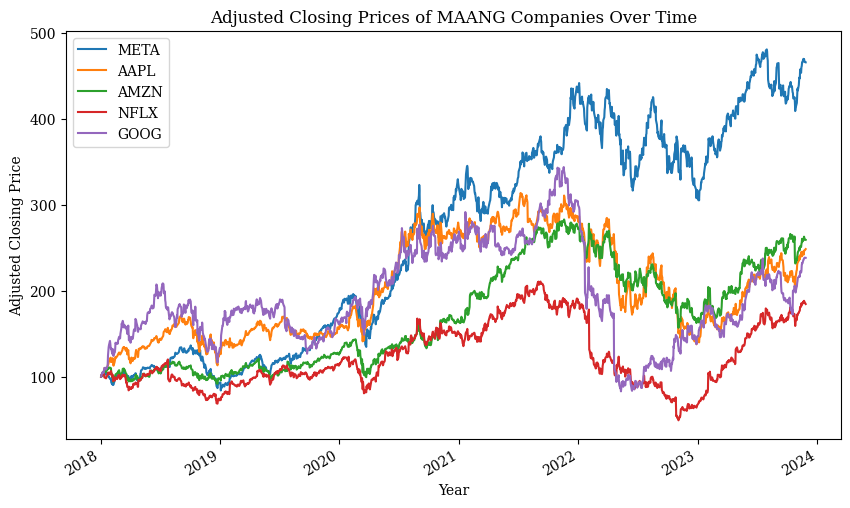

In [4]:
# Normalize the data and plot the line plot
(df / df.iloc[0] * 100).plot(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Adjusted Closing Price')
plt.title('Adjusted Closing Prices of MAANG Companies Over Time')
plt.show()

The line plot displays the trend of the adjusted closing prices of the different MAANG companies. Among all the stocks, we see that Meta experienced the greatest growth starting from the year 2020, which persists till today. All of the companies experienced during the 2020 COVID pandemic.

However, the most notable insight we can draw is the steep decline of Google's stock beginning from late 2022. A quick internet search tells that this coincided with the release of Bard, Google's chatbot, and Wall Street's dissatisfaction with Google's ad revenue and cloud business. However, Google seems to be recovering quite well from this setback.

Next, we draw the logarithmic returns of the MAANG companies in the form of histograms.

Text(0.5, 0.98, 'Logarithmic Returns of MAANG Stocks')

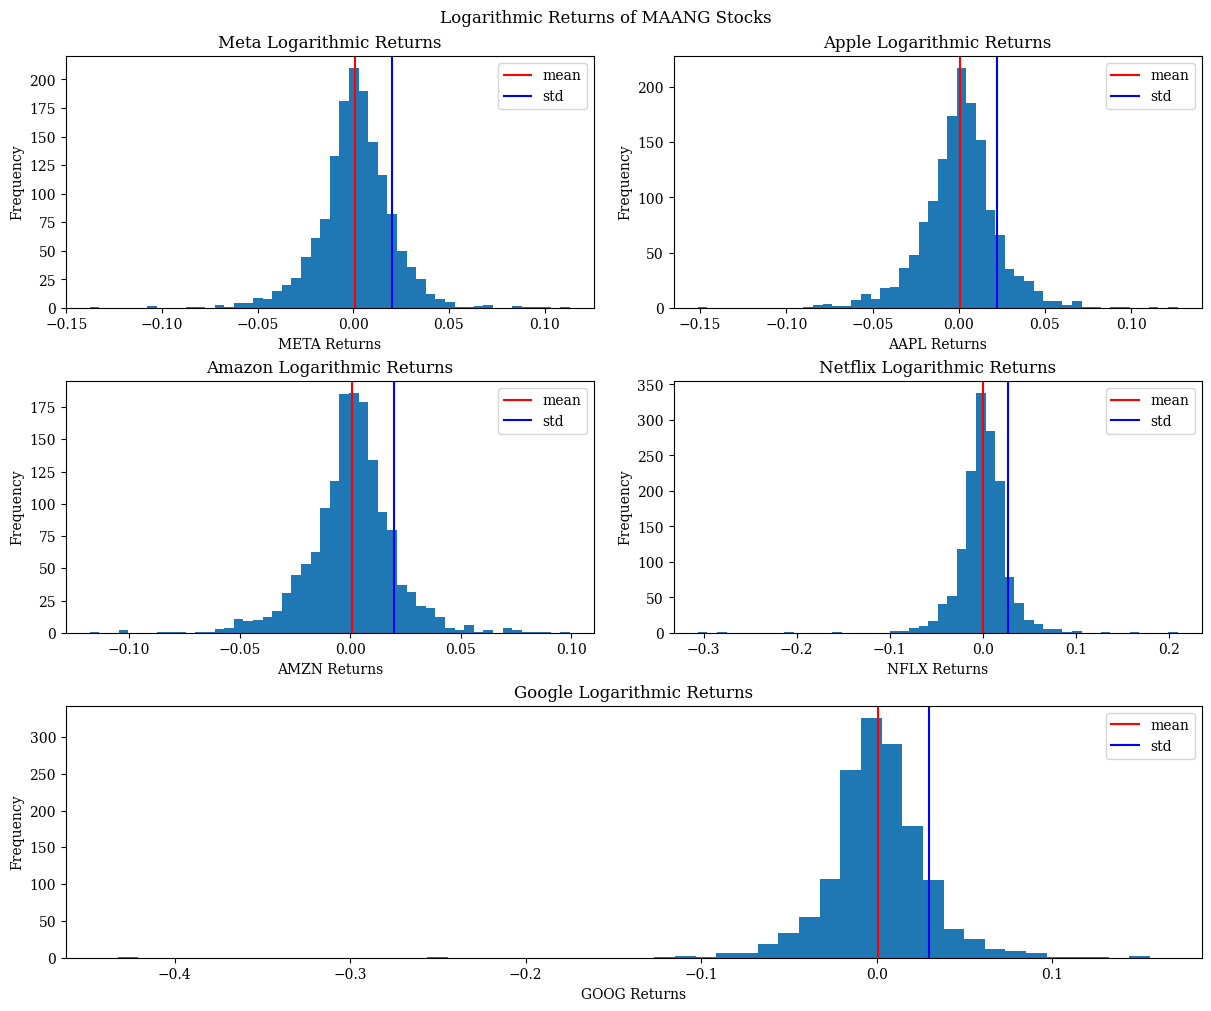

In [5]:
# Get the logarithmic returns of the stocks
rets = np.log(df / df.shift(1))

# Plot them using histograms
# We first define a figure and add a GridSpec to this figure
# It helps to arrange our plots
fig = plt.figure(figsize=(12, 10), layout='constrained')
spec = fig.add_gridspec(3, 2)

# Meta Logarithmic Returns
ax1 = fig.add_subplot(spec[0, 0])
ax1.hist(x=rets['META'], bins=50)
ax1.axvline(rets['META'].mean(), color='r', linewidth=1.5, label='mean')
ax1.axvline(rets['META'].std(), color='b', linewidth=1.5, label='std')
ax1.legend(loc=0)
ax1.title.set_text('Meta Logarithmic Returns')
ax1.set_xlabel('META Returns')
ax1.set_ylabel('Frequency')

# Apple Logarithmic Returns
ax2 = fig.add_subplot(spec[0, 1])
ax2.hist(x=rets['AAPL'], bins=50)
ax2.axvline(rets['AAPL'].mean(), color='r', linewidth=1.5, label='mean')
ax2.axvline(rets['AAPL'].std(), color='b', linewidth=1.5, label='std')
ax2.legend(loc=0)
ax2.title.set_text('Apple Logarithmic Returns')
ax2.set_xlabel('AAPL Returns')
ax2.set_ylabel('Frequency')

# Amazon Logarithmic Returns
ax3 = fig.add_subplot(spec[1, 0])
ax3.hist(x=rets['AMZN'], bins=50)
ax3.axvline(rets['AMZN'].mean(), color='r', linewidth=1.5, label='mean')
ax3.axvline(rets['AMZN'].std(), color='b', linewidth=1.5, label='std')
ax3.legend(loc=0)
ax3.title.set_text('Amazon Logarithmic Returns')
ax3.set_xlabel('AMZN Returns')
ax3.set_ylabel('Frequency')

# Netflix Logarithmic Returns
ax4 = fig.add_subplot(spec[1, 1])
ax4.hist(x=rets['NFLX'], bins=50)
ax4.axvline(rets['NFLX'].mean(), color='r', linewidth=1.5, label='mean')
ax4.axvline(rets['NFLX'].std(), color='b', linewidth=1.5, label='std')
ax4.legend(loc=0)
ax4.title.set_text('Netflix Logarithmic Returns')
ax4.set_xlabel('NFLX Returns')
ax4.set_ylabel('Frequency')

# Google Logarithmic Returns
ax5 = fig.add_subplot(spec[2, :])
ax5.hist(x=rets['GOOG'], bins=50)
ax5.axvline(rets['GOOG'].mean(), color='r', linewidth=1.5, label='mean')
ax5.axvline(rets['GOOG'].std(), color='b', linewidth=1.5, label='std')
ax5.legend(loc=0)
ax5.title.set_text('Google Logarithmic Returns')
ax5.set_xlabel('GOOG Returns')
ax5.set_ylabel('Frequency')

plt.suptitle("Logarithmic Returns of MAANG Stocks")

We see from the histograms that the logarithmic returns of the MAANG stocks are normally distributed. First, all of the histogram have the bell-shaped curve typical of a normal distribution. Second, the mean and standard deviation are close to each other in all cases, further proving our point.

## Getting the average returns, covariance and correlation matrices

The covariance matrix for the financial instruments to be invested in is the central piece of the portfolio selection process. We use the pandas <i>mean</i> and <i>cov</i> methods on the logarithmic returns and annualize the results to gain an understanding of the average returns over time, and how the returns of the MAANG stocks relate to each other. We annualize the results by multiplying them by 252, representing the number of trading days per year.

In [6]:
rets.mean() * 252

META    0.261185
AAPL    0.154465
AMZN    0.161656
NFLX    0.103926
GOOG    0.147365
dtype: float64

Predictably, Google (or Alphabet, if you will) has the highest mean returns.

In [7]:
rets.cov() * 252

,META,AAPL,AMZN,NFLX,GOOG
META,0.101734,0.071002,0.067919,0.078991,0.071107
AAPL,0.071002,0.126559,0.075653,0.093771,0.097186
AMZN,0.067919,0.075653,0.098267,0.090059,0.072568
NFLX,0.078991,0.093771,0.090059,0.190970,0.102105
GOOG,0.071107,0.097186,0.072568,0.102105,0.226580


We see that the covariance matrix shows nothing except positive values. This indicates that all the stocks have the tendency to co-move on the same direction. Therefore, we establish that there is a positive association between all the stocks.

Last but not least, let us check the correlation between the different returns by displaying a correlation matrix. It will help us to establish the strength and magnitude of the relations between the returns.

In [8]:
rets.corr()

,META,AAPL,AMZN,NFLX,GOOG
META,1.000000,0.625738,0.679288,0.566711,0.468346
AAPL,0.625738,1.000000,0.678383,0.603168,0.573916
AMZN,0.679288,0.678383,1.000000,0.657420,0.486329
NFLX,0.566711,0.603168,0.657420,1.000000,0.490854
GOOG,0.468346,0.573916,0.486329,0.490854,1.000000


From the correlation matrix, we deduce that the strongest relation among all the returns is the returns of Meta and Amazon.

In the next phase, we will examine the expected return of the portfolio.

# The Expected Return and Volatility

The client does not want to invest more than 40% of his budget in any single stock. We need to generate 5 random weights for each of the five stocks, and make sure that none of the weights surpass 40%.

In [9]:
# Let's turn this process into a function because we will use it later
def get_weights() -> np.ndarray:
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    while np.all(weights <= 0.4) != True:
        weights = np.random.random(noa)
        weights /= np.sum(weights)
    return weights

weights = get_weights()

print(f"The weights are: {weights.tolist()}")
print(f"The sum of the weights is: {weights.sum()}")
print(f"Are the weights all less than or equal 0.4?\nAnswer: {np.all(weights <= 0.4)}")

The weights are: [0.34116372574490866, 0.21898758156004397, 0.3724582304777921, 0.018409326064622287, 0.04898113615263296]
The sum of the weights is: 1.0
Are the weights all less than or equal 0.4?
Answer: True


Now that we have our weights and average returns, we are able to calculate the expected portfolio return. Given a number of financial instruments $I$, a number of weights $w_1, w_2, ... w_i$ where $\sum \limits _I w_i = 1$, and a number of average returns $\mu_1, \mu_2, ... \mu_i$, we calculate the expected return as:

$$
    E[R_p] = \sum \limits _I w_i \mu_i
$$

In [10]:
# We need to turn this into a function
def get_returns(weights) -> float:
    return np.sum(rets.mean() * weights) * 252

print(get_returns(weights=weights))

0.19227456321327557


Notice that we annualized the expected returns by multiplying the result with the number of trading days. 

Now that we calculated the expected return of the portfolio, the second thing we will concern ourselves with is the variance. By calculating the variance, we will then be able to calculate the standard deviation (i.e. the volatility) of the returns.

Given a number of financial instruments $I$, a number of weights $w_1, w_2, ... w_i$, a number of average returns $R_1, R_2, ... R_i$, and the expected portfolio return $R_p$, we calculate the variance as:

$$
    Var[R_p] = \sum \limits _I w_i * Cov(R_i, R_p)
$$

From there, we calculate the standard deviation of the portfolio as:

$$
    SD[R_p] = \sqrt{Var[R_p]}
$$

In [11]:
# Again, we will turn this into a function
# We use weights.T to get the transpose of the weights matrix
def get_volatility(weights) -> float:
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

print(get_volatility(weights=weights))

0.2874687783926059


Why are interested in calculating the expected return and the volatility of the average returns? There are three reasons:

<ol>
    <li>It gives an idea of the relationship between the risk and return.</li>
    <li>It allows to calculate and visualize the Sharpe Ratio, which is the ratio of the excess return to the excess risk.</li>
    <li>Most importantly, we can a generate a range of risk and return profiles for a set of financial instruments (in this case, the MAANG stocks).</li>
</ol>

To accomplish the third and most important point, we employ Monte Carlo Simulation.

In [12]:
# Instantiate one new list for the returns and one for the volatilities
prets = []
pvols = []

# We choose a range of 2500 values. This number is completely arbitrary
for p in range(2500):
    weights = get_weights()
    prets.append(get_returns(weights=weights))
    pvols.append(get_volatility(weights=weights))
    
prets = np.array(prets)
pvols = np.array(pvols)

Now that we have a range of returns and a range of volatilities, we will proceed with calculating the Sharpe ratio. Given the expected return of a portfolio $E[R_p]$, a risk-free rate of return $r_f$, and the standard deviation of a portfolio $SD[R_p]$, we calculate the Sharpe Ratio as:

$$
    Sharpe Ratio = \frac {E[R_p] - r_f}{SD[R_p]}
$$

We will assume that the risk free rate equals 5%.

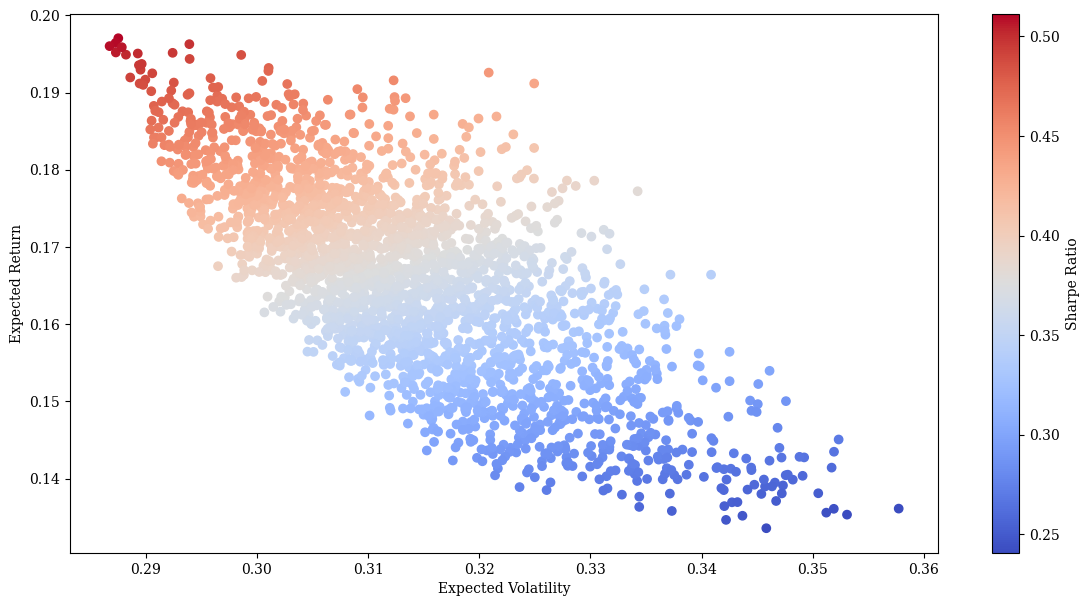

In [13]:
# Calculate the Sharpe Ratio
sharpe_ratio = (prets - 0.05)/pvols

# Visualize the expected returns and risks with the Sharpe Ratio using a scatterplot
plt.figure(figsize=(14, 7))
plt.scatter(pvols, prets, c=sharpe_ratio, marker='o', cmap='coolwarm')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')

# The Optimal Portfolio

Having calculated the Sharpe Ratio, it is now possible for us to optimize the portfolio such that we select only the most attractive investments. To do that, we need to maximize the Sharpe Ratio to get a set of the best investments with the highest return given a certain level of risk.

To begin, we will import the <i>minimize</i> method from the <i>scipy.optimize</i> module. Although it sounds counter-intuitive to use the <i>minimize</i> method because we want to maximize the Sharpe Ratio, we can use the <i>minimize</i> method on the negative value of the Sharpe Ratio to maximize it.

In [14]:
# Import the necessary method
import scipy.optimize as sco

# We define the function to be minimized
# Don't forget the risk free rate
def min_func_sharpe(weights):
    return -(get_returns(weights=weights)-0.05) / get_volatility(weights=weights)

# Define the equality constraint (All weights must sum up to 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
print(f"Constraints: {constraints}")

# Define the boundaries for the parameters (All the weight values must be between 0 and 0.4)
bounds = tuple((0, 0.4) for x in range(noa))
print(f"Bounds: {bounds}")

# The equal weights vector (Assume an equal distribution of weights)
eweights = noa * [1. / noa,]
print(f"Equal Weights Vector: {eweights}")

Constraints: {'type': 'eq', 'fun': <function <lambda> at 0x7f3ab9b1bd80>}
Bounds: ((0, 0.4), (0, 0.4), (0, 0.4), (0, 0.4), (0, 0.4))
Equal Weights Vector: [0.2, 0.2, 0.2, 0.2, 0.2]


Now that we have all the values we need, we can proceed with maximizing the Sharpe Ratio.

In [15]:
# Use the Sequential Least Squares Programming (SLSQP) method for the minimization
optimal_portfolio = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bounds, constraints=constraints)

optimal_portfolio

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.5232965918878305
       x: [ 4.000e-01  1.799e-01  4.000e-01  0.000e+00  2.006e-02]
     nit: 6
     jac: [-3.884e-01 -7.417e-03 -4.427e-02  1.892e-01 -7.391e-03]
    nfev: 36
    njev: 6

Let's make sure that everything is alright by printing some outputs. 

In [16]:
print(f"Max Portfolio Weights: {optimal_portfolio['x'].round(3).tolist()}")
print(f"Max Returns: {get_returns(optimal_portfolio['x'].round(3))}")
print(f"Max Volatilities: {get_volatility(optimal_portfolio['x'].round(3))}")
print(f"Maximized Sharpe Ratio: {get_returns(optimal_portfolio['x']) - 0.05 / get_volatility(optimal_portfolio['x'])}")

Max Portfolio Weights: [0.4, 0.18, 0.4, 0.0, 0.02]
Max Returns: 0.1998877971007946
Max Volatilities: 0.2864299127455931
Maximized Sharpe Ratio: 0.025324132218361106


Our second concern before moving on is to minimize the portfolio volatility. We do that by calling the <i>minimize</i> again. However, we will pass in the <i>get_volatility</i> function to get the minimized volatilities.

In [17]:
# Minimize the portfolio variance
def min_func_variance(weights):
    return get_volatility(weights=weights) ** 2

optimal_variance = sco.minimize(min_func_variance, eweights, method='SLSQP', bounds=bounds, constraints=constraints)

optimal_variance

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0819468277636925
       x: [ 4.000e-01  1.547e-01  4.000e-01  1.228e-17  4.535e-02]
     nit: 8
     jac: [ 1.641e-01  1.652e-01  1.629e-01  1.735e-01  1.660e-01]
    nfev: 49
    njev: 8

# The Efficient Frontier

Having maximized the Sharpe Ratio, we can now use it to draw the Efficient Frontier. The Efficient Frontier is a set of investment portfolios that display the highest returns given a certain level of risk. 

In [18]:
# We will add an additional constraint (Our Returns should equal the target return)
constraints = ({'type': 'eq', 'fun': lambda x: get_returns(x) - tret},
              {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Our target retuns will be represented as a list of uniformly distributed weights
trets = np.linspace(0.0, 0.25, 50)

# Define the target volatilities list
tvols = []

# Get the target volatilities using scipy.optimize.optimize
for tret in trets:
    res = sco.minimize(get_volatility, eweights, method='SLSQP', bounds=bounds, constraints=constraints)
    tvols.append(res['fun'])

tvols = np.array(tvols)
tvols

array([0.36755552, 0.36755552, 0.36755552, 0.36755552, 0.36755552,
       0.36755552, 0.36755552, 0.36755552, 0.36755552, 0.36755552,
       0.36755552, 0.36755552, 0.36755552, 0.36755552, 0.36755552,
       0.36755552, 0.36755552, 0.36755552, 0.36755552, 0.36755552,
       0.36755552, 0.36755552, 0.36755552, 0.36755552, 0.36755552,
       0.36755552, 0.35022742, 0.32499984, 0.31535598, 0.30941428,
       0.30548732, 0.30188864, 0.2986301 , 0.29572297, 0.29317951,
       0.29100456, 0.28920952, 0.28780191, 0.2867879 , 0.28628407,
       0.28681223, 0.28681223, 0.28681223, 0.28681223, 0.28681223,
       0.28681223, 0.28681223, 0.28681223, 0.28681223, 0.28681223])

We now have everything we need to plot the Efficient Frontier.

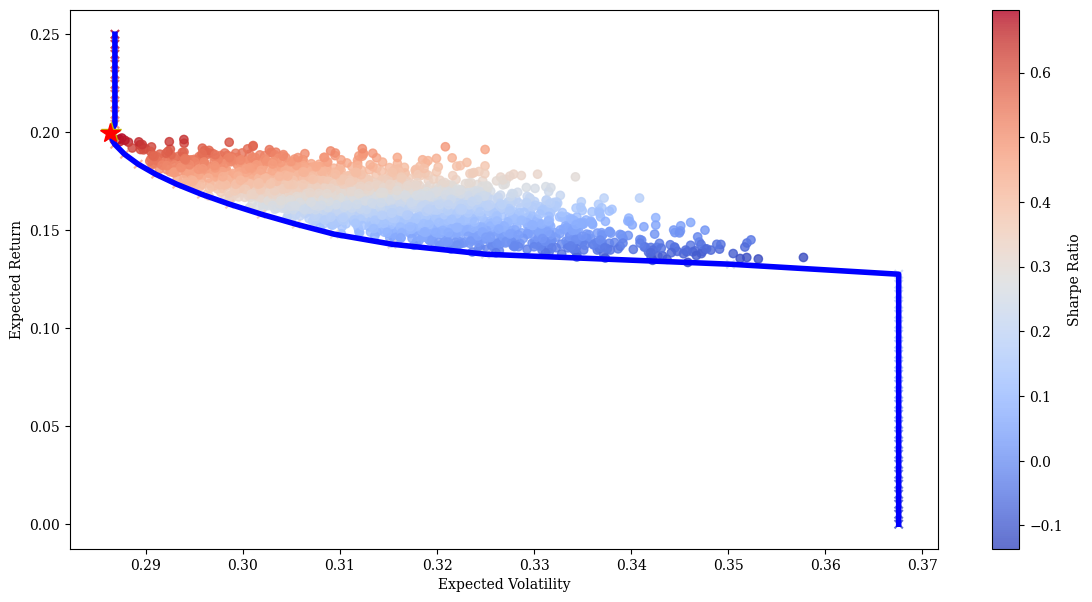

In [19]:
# Calculate both types of Sharpe Ratio
portfolio_sharpe_ratio = (prets - 0.05)/pvols
random_portfolio_sharpe_ratio = (trets - 0.05)/tvols

# Portfolio Returns Composition
plt.figure(figsize=(14, 7))
plt.scatter(pvols, prets, c=portfolio_sharpe_ratio, marker='o', alpha=0.8, cmap='coolwarm')

# Random Portfolio Composition
plt.scatter(tvols, trets, c=random_portfolio_sharpe_ratio, marker='x', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)

# Efficient Frontier
plt.plot(get_volatility(optimal_portfolio['x']), get_returns(optimal_portfolio['x']), 'y*', markersize=15.0)

# Portfolio with highest Sharpe Ratio
plt.plot(get_volatility(optimal_variance['x']), get_returns(optimal_variance['x']), 'r*', markersize=15.0)

# Minimum Variance Portfolio
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')